In [5]:
import pandas as pd

In [6]:
housing=pd.read_csv("/content/drive/MyDrive/california.csv")

In [7]:
housing.shape

(20640, 10)

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
housing.ocean_proximity=le.fit_transform(housing.ocean_proximity)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(train_set.shape,test_set.shape)

(16512, 10) (4128, 10)


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["ocean_proximity"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
print(strat_train_set.shape,strat_test_set.shape)

(16512, 10) (4128, 10)


In [16]:
housing=strat_train_set.copy()

In [17]:
corr_matrix=housing.corr()
correlation=corr_matrix["median_house_value"].sort_values(ascending=False)
print(correlation)

median_house_value    1.000000
median_income         0.683395
total_rooms           0.135182
housing_median_age    0.104590
ocean_proximity       0.078870
households            0.067550
total_bedrooms        0.052104
population           -0.024169
longitude            -0.040574
latitude             -0.150477
Name: median_house_value, dtype: float64


In [18]:
housing["total_rooms_per_household"]=housing["total_rooms"]/housing["households"]

In [19]:
corr_matrix=housing.corr()
correlation=corr_matrix["median_house_value"].sort_values(ascending=False)
print(correlation)

median_house_value           1.000000
median_income                0.683395
total_rooms_per_household    0.149701
total_rooms                  0.135182
housing_median_age           0.104590
ocean_proximity              0.078870
households                   0.067550
total_bedrooms               0.052104
population                  -0.024169
longitude                   -0.040574
latitude                    -0.150477
Name: median_house_value, dtype: float64


In [20]:
housing=strat_train_set.drop("housing_median_age",axis=1)
housing_label=strat_train_set["housing_median_age"].copy()
housing_test=strat_test_set.drop("housing_median_age",axis=1)
housing_test_label=strat_test_set["housing_median_age"].copy()

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scalor',StandardScaler())])
housing_num_tr=my_pipeline.fit_transform(housing)

In [24]:
housing_num_tr.shape

(16512, 9)

In [25]:
from sklearn.linear_model import LinearRegression
modal=LinearRegression()
modal.fit(housing_num_tr,housing_label)

LinearRegression()

In [26]:
prepared_data=my_pipeline.transform(housing_test)

In [27]:
(list(modal.predict(prepared_data)))

[30.060662056624402,
 28.618958146894123,
 26.486049176988292,
 34.35373560380624,
 26.380234536815397,
 29.788566187554572,
 22.651710693381347,
 39.01827885424968,
 31.826899497964465,
 34.27441914935948,
 24.19238670734718,
 27.059678000546636,
 36.362836582144915,
 28.487306392296446,
 22.35422557507922,
 29.389794326827218,
 24.15591049920556,
 30.89118621080916,
 25.462764973399974,
 31.1548394745187,
 18.400033775706582,
 29.618089479762723,
 32.26986934735329,
 29.736475305659766,
 27.285858340982962,
 23.704509912168646,
 34.27454474050601,
 34.38555421540106,
 24.806648545204794,
 23.85233926650877,
 33.24380252756314,
 30.41130549472749,
 31.826070775885523,
 23.889620170643415,
 34.13836966809389,
 29.13950850538212,
 33.85918241528053,
 34.870691654706306,
 35.84547667715245,
 33.65695478689897,
 30.11496989643892,
 31.16447692619107,
 28.57801062294146,
 34.02085618376291,
 30.111385675375303,
 34.93837693377332,
 32.220721998818135,
 30.88568221126629,
 31.87063861179790

In [28]:
prepared_data.shape

(4128, 9)

In [29]:
list(housing_test_label)

[45,
 34,
 26,
 34,
 52,
 34,
 22,
 45,
 14,
 33,
 16,
 30,
 25,
 45,
 21,
 35,
 37,
 36,
 36,
 45,
 14,
 12,
 46,
 16,
 17,
 15,
 49,
 21,
 17,
 17,
 41,
 12,
 47,
 28,
 52,
 18,
 41,
 38,
 33,
 34,
 18,
 52,
 31,
 37,
 41,
 47,
 19,
 37,
 35,
 37,
 11,
 25,
 42,
 21,
 27,
 6,
 4,
 26,
 52,
 37,
 49,
 5,
 16,
 14,
 33,
 45,
 44,
 20,
 24,
 42,
 34,
 52,
 8,
 36,
 25,
 41,
 37,
 27,
 29,
 34,
 34,
 17,
 24,
 8,
 26,
 20,
 14,
 52,
 31,
 17,
 23,
 39,
 12,
 22,
 29,
 30,
 37,
 23,
 35,
 20,
 15,
 23,
 52,
 18,
 38,
 17,
 20,
 17,
 34,
 40,
 13,
 14,
 15,
 14,
 37,
 52,
 22,
 29,
 26,
 16,
 29,
 21,
 28,
 32,
 42,
 2,
 15,
 6,
 32,
 52,
 20,
 49,
 19,
 52,
 19,
 46,
 16,
 8,
 34,
 15,
 34,
 33,
 36,
 41,
 31,
 29,
 12,
 32,
 22,
 52,
 29,
 17,
 52,
 33,
 17,
 49,
 23,
 36,
 44,
 23,
 17,
 37,
 17,
 18,
 26,
 31,
 4,
 52,
 17,
 30,
 9,
 31,
 16,
 23,
 25,
 30,
 36,
 22,
 38,
 3,
 51,
 32,
 26,
 52,
 32,
 48,
 20,
 25,
 17,
 49,
 49,
 16,
 23,
 31,
 15,
 15,
 7,
 26,
 52,
 52,
 31,
 20,
 4

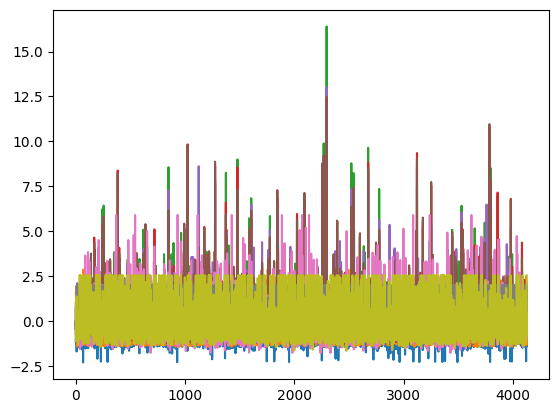

In [30]:
plt.plot(prepared_data)

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error
prediction=modal.predict(housing_num_tr)
mse=mean_squared_error(housing_label,prediction)
rmse=np.sqrt(mse)

In [32]:
print("rmse",rmse)

rmse 11.026060684529975
